In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

df = pd.read_csv('../Datasets/preprov2_train.csv',index_col='PassengerId')

In [2]:
df.head()

,feature 0,feature 1,feature 2,feature 3,feature 4,Survived
PassengerId,,,,,,
0,-1.030814,0.848783,-0.311467,-0.579500,0.039039,0
1,-0.792915,-0.976344,0.388193,0.023417,0.636212,0
2,-1.138405,-0.404615,-0.108922,0.009174,0.422233,0
3,-0.462582,-0.565832,-0.309521,-0.114239,-0.216770,0
4,-1.273158,-0.142681,-0.379161,-0.040849,0.370932,0


In [3]:
X = df.drop("Survived",axis =1)
y = df[['Survived']]

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y)

# Previous Results

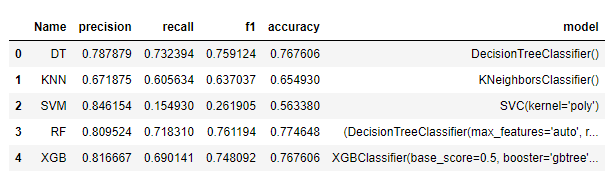

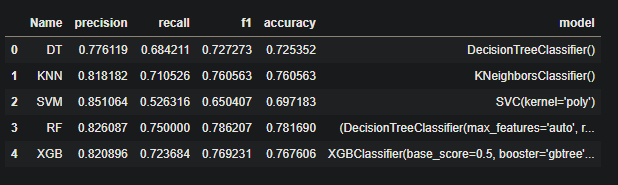

### Model Selected: Random Forest

# Grid Search

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [14]:
# def grid_RF(X_train,y_train):    
#     from sklearn.model_selection import GridSearchCV
#     from sklearn.ensemble import RandomForestClassifier
    
#     estimator = RandomForestClassifier(
#         n_jobs=-1
#     )
    
#     parameters = {'bootstrap': [True, False],
#          'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
#          'max_features': ['auto', 'sqrt'],
#          'min_samples_leaf': [1, 2, 4],
#          'min_samples_split': [2, 5, 10],
#          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

#     grid_search = GridSearchCV(
#         estimator=estimator,
#         param_grid=parameters,
#         scoring = 'f1',
#         n_jobs = -1,
#         cv = 10,
#         verbose=4
#     )

#     grid_search.fit(X_train, y_train)
#     return grid_search

In [15]:
model = grid_RF(X_train,y_train)

Fitting 10 folds for each of 3960 candidates, totalling 39600 fits


G:\Apps\Anaconda\install\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [16]:
model.best_estimator_

RandomForestClassifier(max_depth=90, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, n_jobs=-1)

In [17]:
from pickle import dump, load

In [18]:
# dump(model.best_estimator_, open('../models/Classifiers/grid_RFv1.pkl', 'wb'))

In [25]:
# dump(model,open('grid_RF_fullv1.pkl','wb'))

In [19]:
def plot_y(true_value,predicted_value, model_type = 'regression', model = np.nan):
    from sklearn.metrics import confusion_matrix, roc_curve
    import matplotlib.pyplot as plt
    
    if model_type == 'regression':
        plt.figure(figsize=(10,10))
        plt.scatter(true_value, predicted_value, c='crimson')
        plt.yscale('log')
        plt.xscale('log')

        p1 = max([max(predicted_value), max(true_value)])
        p2 = min([min(predicted_value), min(true_value)])
        plt.plot([p1, p2], [p1, p2], 'b-')
        plt.xlabel('True Values', fontsize=15)
        plt.ylabel('Predictions', fontsize=15)
        plt.axis('equal')
        plt.show();
        
    elif model_type == 'classification':
        confusion = confusion_matrix(true_value,predicted_value)
        
        if model != np.nan:
            
            plt.figure(figsize=(15, 7))
            
            
            #Predicted Probabilities
            plt.subplot(1,2,1)
            y_pred_prob = model.predict_proba(X_test)[:, 1]
            plt.hist(y_pred_prob, bins=8)
            
            # Predicted Probabilities Hist
            plt.xlim(0,1)
            plt.title('Histogram of predicted probabilities')
            plt.xlabel('Predicted probabilities')
            plt.ylabel('Frequency')
#             plt.show()
            
            #ROC_Curve
            plt.subplot(1,2,2)
            fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
            plt.plot(fpr, tpr)
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.0])
            plt.rcParams['font.size'] = 12
            plt.title('ROC curve for classifier')
            plt.xlabel('False Positive Rate (1 - Specificity)')
            plt.ylabel('True Positive Rate (Sensitivity)')
            plt.grid(True)
            
            
            plt.show()
            

In [20]:
def results_classification(y_train,y_pred,name = 'model',model = None,printing = True):
    from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score
    results = pd.DataFrame(columns= ['Name','precision','recall','f1'])
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    if printing:
        print(f'Training           {name}...')
        print(f'accuracy:          {accuracy}')
        print(f'Testing precision: {precision}')
        print(f'Testing recall:    {recall}')
        print(f'Testing f1:        {f1}')

    results = results.append({'Name':name,'model':model, 'accuracy':accuracy, 'precision':precision, 'recall':recall, 'f1':f1 },ignore_index = True)
    return results

In [21]:
y_pred = model.best_estimator_.predict(X_test)

In [22]:
results_classification(y_train,y_pred,model=model.best_estimator_, name = 'grid_RFv1',printing = True)

Training           grid_RFv1...
accuracy:          0.7464788732394366
Testing precision: 0.759493670886076
Testing recall:    0.7792207792207793
Testing f1:        0.7692307692307693


,Name,precision,recall,f1,accuracy,model
0,grid_RFv1,0.759494,0.779221,0.769231,0.746479,"(DecisionTreeClassifier(max_depth=90, max_feat..."


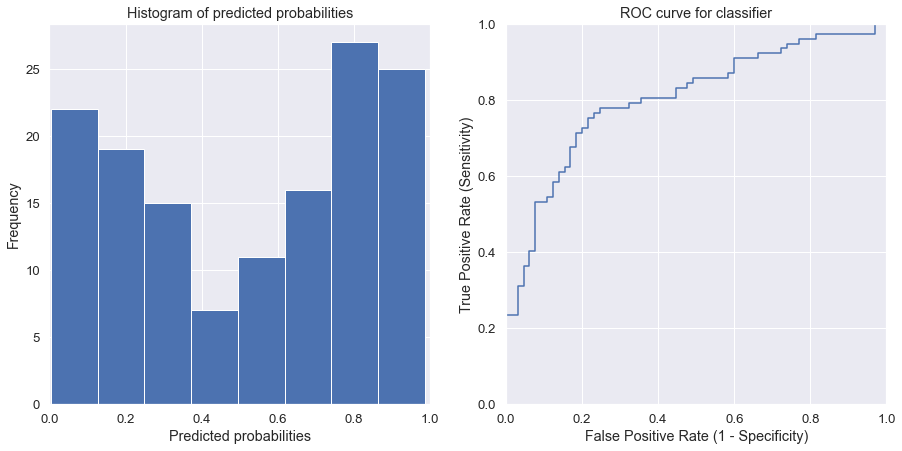

In [23]:
plot_y(y_test,y_pred,model_type='classification',model = model.best_estimator_)